# Comparison

In [2]:
import time
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns

from common import *

%matplotlib inline
import visualization as viz
viz.set_plot_style()

print('numpy ver.: ' + np.__version__)
print('pandas ver.: ' + pd.__version__)

numpy ver.: 1.12.1
pandas ver.: 0.20.1


In [3]:
data = prep_data('../data/4A_1_201710.csv')
print(len(data))

38844


Links included in the evaluation, i.e. the first 32 links of 4A in the CCW direction:

In [4]:
data = data[(1 <= data['LineDirectionLinkOrder']) & (data['LineDirectionLinkOrder'] <= 32)]
assert len(data['LinkRef'].unique()) == 32
n = len(data)
print(n)

30272


In [13]:
data['DateTime'] = pd.to_datetime(data['DateTime'])

In [22]:
data['Headway'] = (data['DateTime'] - data.groupby('LinkRef').shift(1)['DateTime']) / np.timedelta64(1, 'm')

In [26]:
data['Headway'].mean()

7.60070932539682

In [28]:
data.groupby('DowTimeRef')['Headway'].mean().mean()

11.837199185450006

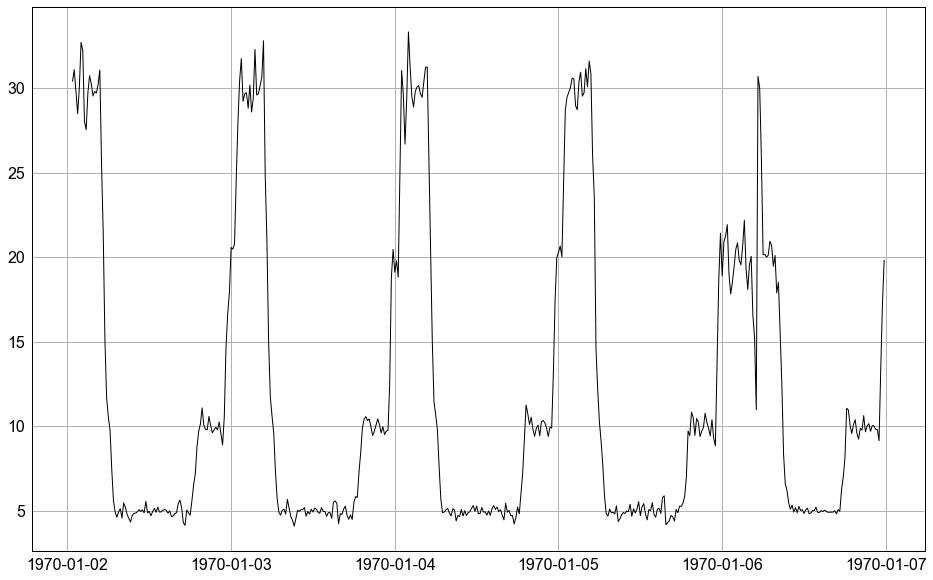

In [39]:
plt.plot(data.groupby('DowTimeRef')['Headway'].mean(), color = 'C0', linewidth = 1)